In [18]:
!pip install mne

In [2]:
import sys
import numpy as np
import mne
from mne.time_frequency import (
    tfr_multitaper,
    tfr_stockwell,
    tfr_morlet,
    tfr_array_morlet,
    AverageTFR,
)
from scipy import signal
from scipy.fft import fftshift
from matplotlib import pyplot as plt
%matplotlib qt

Change the folder and file location accordingly

In [3]:
my_folder = "/Users/landonmattingly/Desktop/Mayo Lab/"
my_file = (my_folder + "Subject00_1.edf")
raw = mne.io.read_raw(my_file, preload=True)

Extracting EDF parameters from /Users/landonmattingly/Desktop/Mayo Lab/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...


In [99]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>


In [5]:
myAnnotations = mne.read_annotations(my_file)
print(myAnnotations)
raw.set_annotations(myAnnotations)

<Annotations | 0 segments>


<RawEDF | Subject00_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>

Using matplotlib as 2D backend.


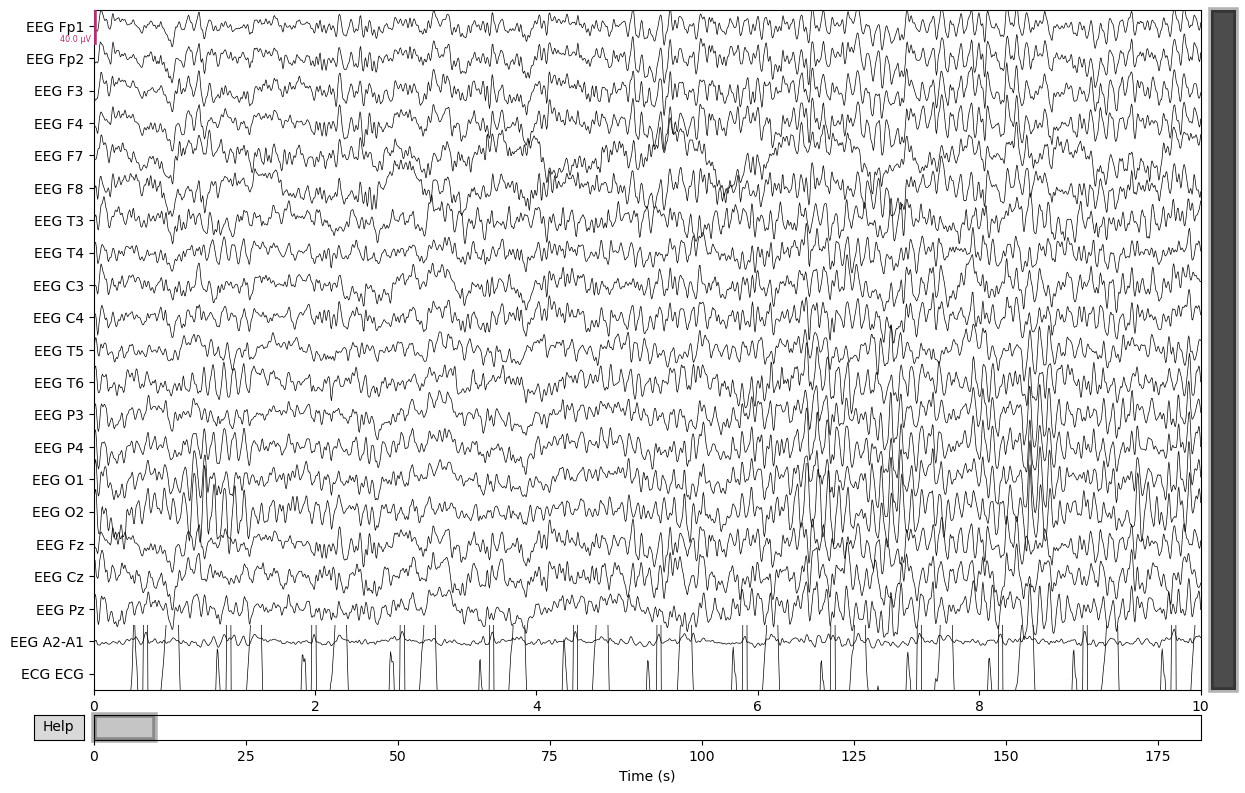

Channels marked as bad:
none


In [29]:
raw.plot(n_channels=21)

In [32]:
raw.drop_channels("ECG ECG")
raw_filtered = raw.copy().filter(79, 249)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 79 - 2.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 79.00
- Lower transition bandwidth: 19.75 Hz (-6 dB cutoff frequency: 69.12 Hz)
- Upper passband edge: 249.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 249.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


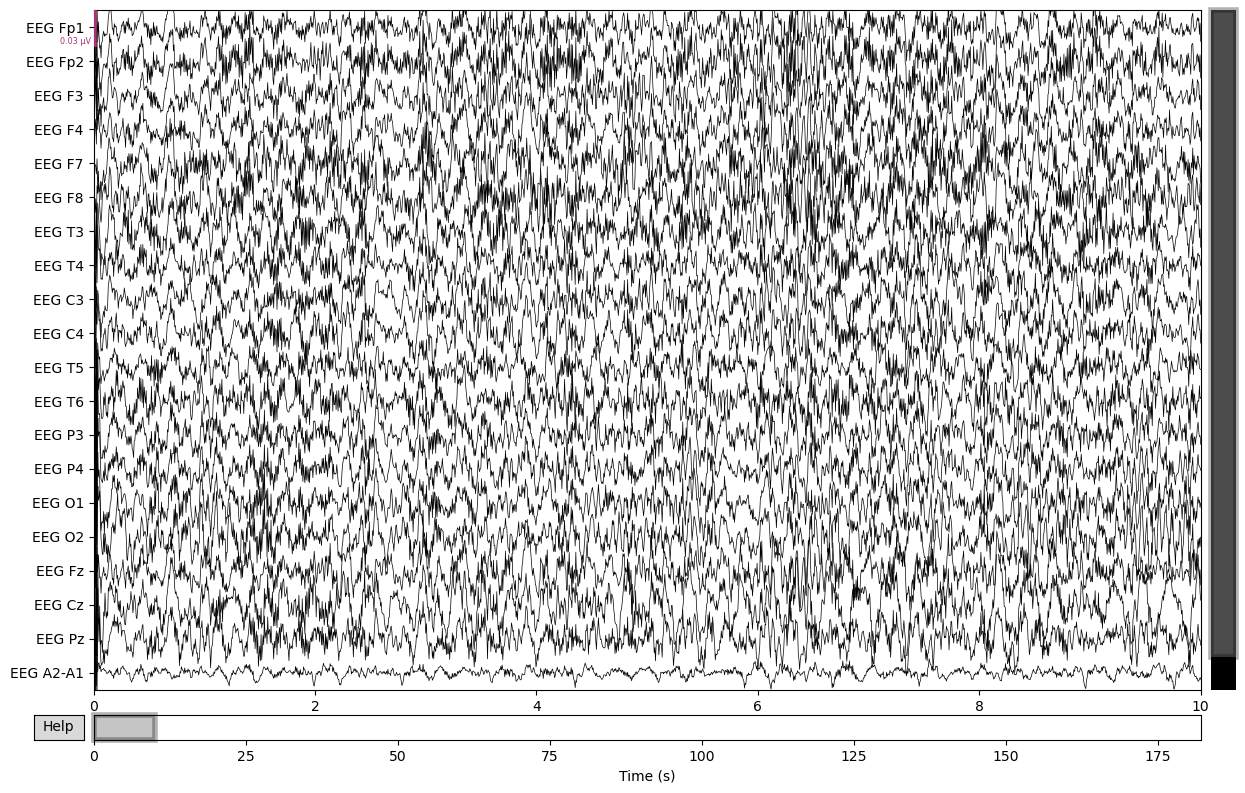

Channels marked as bad:
none


In [128]:
raw_filtered.plot(scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


/var/folders/x7/lr3zvcq92hz7y86y7pp06qxw0000gn/T/ipykernel_2950/1154864708.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filtered.plot_psd()


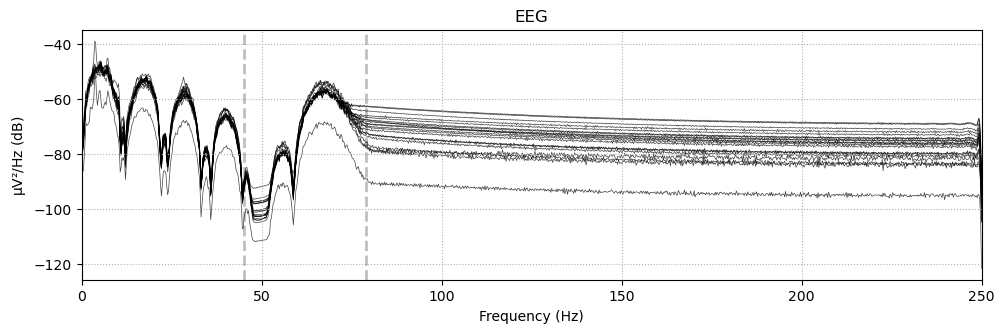

In [33]:
raw_filtered.plot_psd()

In [65]:
epochs = mne.make_fixed_length_epochs(raw_filtered, duration=1)
epochs.drop_bad()

Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 182 events and 500 original time points ...
0 bad epochs dropped


Number of events,182
Events,1: 182
Time range,0.000 – 0.998 s
Baseline,off


In [66]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(epochs, Fs=500)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()   

/var/folders/x7/lr3zvcq92hz7y86y7pp06qxw0000gn/T/ipykernel_2950/3044387328.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=182).
  powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(epochs, Fs=500)
